#2. [R] With a starting point of x0 =0 0 . . . 0 ⊤∈ R10, solve problem (1) using the Newton’s method implemented with backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for backtracking line search and τ = 10−4).Comment on difficulties (if any) you face when computing the inverse of Hessian (recall that you need to use an appropriate Python function to compute the inverse of the Hessian). If you face difficulty in computing inverse of Hessian, try to think of some remedy so that you can avoid the issue.• Let x∗ be the final optimal solution provided by your algorithm. Report the values of x∗ and ¯x, and discuss the observations.• Plot the values $log(||x^k − x∗||2)$ against iterations k = 0, 1, 2, . . ..
#• Prepare a different plot for plotting $log(|f(x^k) − f(x∗)|)$ obtained from Newton’s method against the iterations.
#• Comment on the convergence rates of the iterates and the objective function values, by recalling the definitions given above.

Given that

for the Q-Linear

$\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}\leq r$, Where $r\in(0,1)$

taking log both side, we get


$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq log(r)$


Becuse $r\in (0,1)$

which implies  $log(r)< 0$
 
$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq 0$


Hence, the Convergence of the function is Q-Linear.



In [36]:
import numpy as np

In [37]:
import math

In [38]:
import matplotlib.pyplot as plt


In [39]:
from timeit import default_timer as timer
np.random.seed(1000)

In [40]:
from timeit import default_timer as timer
np.random.seed(1000)

In [41]:
A=np.random.randn(1000,10)

In [42]:
eps=np.random.randn(1000,1)

In [53]:
x=[]
for i in range(1,11):
  if i%2==0:
    x.append(np.random.uniform(i,i+1))
  if i%2!=0:
    x.append(np.random.uniform(-i-1,-i))
print(x)

[-1.7203762374818616, 2.139677485995843, -3.3557641719826834, 4.753203861191703, -5.461630302357411, 6.238962237665244, -7.607159990153633, 8.627938447272507, -9.852328896795438, 10.076336139576393]


In [54]:
x_bar=np.array(x)
x_bar=x_bar.reshape(10,1)

In [55]:
A_x=A@x_bar

In [57]:
y=A_x+eps

In [103]:
def evalf(x,n):
  assert type(x) is np.ndarray and  len(x)==n
  f_vl=np.linalg.norm(A@x - y)
  f_vl=f_vl**(2)
  f_vl=(0.5)*f_vl
  return f_vl

In [104]:
x=np.array([0 for i in range(10)])
evalf(x,10)

248344629.97285467

In [105]:
def evalg(x,n):
  assert type(x) is np.ndarray 
  assert len(x) == n
  return A.T@ (np.matmul(A, x) - y)

In [106]:
def evalh(x,n):
  assert type(x) is np.ndarray 
  assert len(x) == n 
  return A.T @ A

In [107]:
BACKTRACKING_LINE_SEARCH = 1

In [108]:
def compute_B_k(s, y, B_k, n):
  assert type(s) is np.ndarray and len(s) == n
  assert type(B_k) is np.ndarray and len(y) == n 
  mu = 1 / np.dot(np.squeeze(np.asarray(y)), np.squeeze(np.asarray(s)))
  I = np.identity(n)
  a_1 = np.outer(np.multiply(mu, s), y.T)
  a_2 = np.outer(np.multiply(mu, y), s.T)
  b_k = np.add(np.matmul(np.matmul(I - a_1, B_k), I - a_2), np.outer(np.multiply(mu, s), s.T) )
  return b_k

In [109]:
def compute_D_k(x,n):
  assert type(x) is np.ndarray and len(x) == n
  if np.linalg.det(evalh(x,n)) == 0:
    raise ValueError('Determinant of Hessian is zero')
  return np.linalg.inv(evalh(x,n))

In [110]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma, B_k): 
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  n = len(x)
  alpha = alpha_start
  p = - gradf 
  D_k = B_k
  while evalf(x + alpha*np.matmul(D_k,p), n) > evalf(x, n) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha  

In [111]:
def find_minimizer_Newton(start_x, n, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == n
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n)
  h_x = evalh(x,n)
  x_iteration = []
  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  step_length = 1.0
  while (np.linalg.norm(g_x) > tol): 
    D_k = np.linalg.inv(evalh(x, n))
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma, D_k)

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    x_iteration.append(x)
    k += 1 
    g_x = evalg(x, n) 
  return x, x_iteration

In [122]:
n = 10
my_start_x = np.array([0 for i in range(10)])
my_start_x = my_start_x.reshape(10,1)
my_tol  = 10**(-5)
alpha =0.99
rho=0.5
gamma=0.5
x_array = []
f_array = []
print("For Newton's Method : ")
print("_____________________________________________________________")
time1 = timer()
x_star_newton , x_k = find_minimizer_Newton(my_start_x, 10, my_tol, BACKTRACKING_LINE_SEARCH, alpha , rho, gamma)
time2 = timer()
for i in range(len(x_k)-1):
  x_array.append(math.log(np.linalg.norm(x_k[i] - x_star_newton)))
  f_array.append(math.log(np.linalg.norm(evalf(x_k[i],n) - evalf(x_star_newton,n))))
print("x_str:", x_star_newton)
print("x_bar:",x_bar)
print("_____________________________________________________________")
print("f_str:", evalf(x_star_newton,n), "\nf_bar:", evalf(x_bar,n))
print("_____________________________________________________________")
print("Time taken by Newton's method: ", time2-time1)

For Newton's Method : 
_____________________________________________________________
x_str: [[-1.68672761]
 [ 2.16855328]
 [-3.39032522]
 [ 4.7181836 ]
 [-5.46236925]
 [ 6.22803418]
 [-7.61166053]
 [ 8.65518106]
 [-9.80627458]
 [10.04154365]]
x_bar: [[-1.72037624]
 [ 2.13967749]
 [-3.35576417]
 [ 4.75320386]
 [-5.4616303 ]
 [ 6.23896224]
 [-7.60715999]
 [ 8.62793845]
 [-9.8523289 ]
 [10.07633614]]
_____________________________________________________________
f_str: 504.5963652036184 
f_bar: 508.51427768443995
_____________________________________________________________
Time taken by Newton's method:  0.007738190000054601


#f_str value < f_bar_value 

#Time taken by Newton's method:  0.007738190000054601


#• Ploting the values $log(||x
^k −( x∗)
||2)$ against iterations k = 0, 1, 2, . . ..

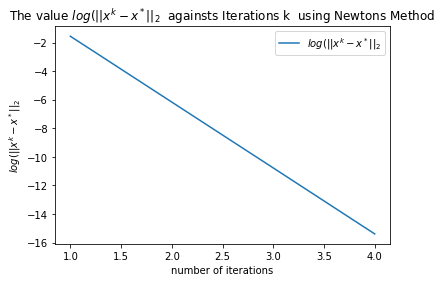

In [126]:
plt.plot([i+1 for i in np.arange(4)], x_array,label=r'$ $')
plt.title(r'The value $log(||x^k - x^*||_2$  againsts Iterations k  using Newtons Method')
plt.xlabel('number of iterations')
plt.ylabel(r'$log(||x^k - x^*||_2$')
plt.legend(['$log(||x^k - x^*||_2$'])
plt.show()

#• Preparing a different plot for plotting $log(|f(x^k) − f(x∗)|)$ obtained from Newton’s method against theiterations.


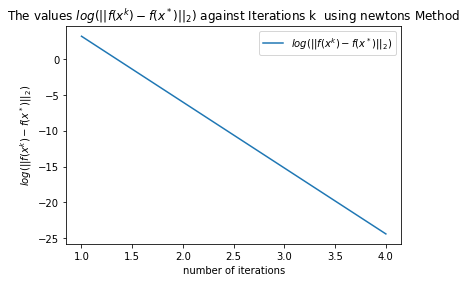

In [127]:
plt.plot([i+1 for i in np.arange(4)], f_array,label=r'$ $')
plt.title(r'The values $log(||f(x^k) - f(x^*)||_2)$ against Iterations k  using newtons Method')
plt.xlabel(r'number of iterations')
plt.ylabel(r'$log(||f(x^k) - f(x^*)||_2)$')
plt.legend([r'$log(||f(x^k) - f(x^*)||_2)$'])
plt.show()

#3. [R] With a starting point of x0 =0 0 . . . 0 ⊤∈ R10, solve problem (1) using the BFGS method implementedin the previous lab with backtracking line search (use α0 = 0.99, ρ = 0.5, γ = 0.5 for backtracking line search and τ = 10−4).• Let x∗ be the final optimal solution provided by your BFGS algorithm. Report the values of x∗ and ¯x,and discuss the observations.
#• Plot the values $log(||x^k − x∗||2)$ against iterations k = 0, 1, 2, . . ..
#• Prepare a different plot for plotting log(|f(xk)−f(x∗)|)$ obtained from BFGS method against the iterations.

#• Comment on the convergence rates of the iterates and the objective function values obtained by BFGS method.


#Solution:

In [79]:
def find_minimizer_BFGS_scaling(start_x, n, tol, line_search_type, *args):
 
  assert type(start_x) is np.ndarray and len(start_x) == n 
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x,n)

  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  B_k = np.identity(n)
  x_prev = x
  x_itr = []
  while (np.linalg.norm(g_x) > tol):
    step_length = compute_steplength_backtracking_scaled_direction(x_prev, g_x, alpha_start, rho, gamma, B_k)
    x_new = np.subtract(x_prev, np.multiply(step_length, np.matmul(B_k,g_x))) 
    g_x = evalg(x_new,n)
    s = np.subtract(x_new, x_prev)
    y = np.subtract(evalg(x_new,n), evalg(x_prev,n)) 
    B_k = compute_B_k(s, y, B_k, n)
    x_prev = x_new
    k += 1
    x_itr.append(x_new)
  return x_new,x_itr

In [133]:
n=10
x_start=np.array([0 for i in range(10)]).reshape(10,1)
alpha_start=0.99
rho=0.5
gamma=0.5
my_tol= 1e-5
x_BFGS = []
f_BFGS = []
print("BFGS Method optimizers: ")
time1_bfgs = timer()
x_star_bfgs,x_k1 = find_minimizer_BFGS_scaling(x_start, n, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
time2_bfgs = timer()
print('_____________________________________________________________________________________')
print("x_str:", x_star_bfgs, "\nx_bar:", x_bar)
print("f_str:", evalf(x_star_bfgs,n), "\nf_bar:", evalf(x_bar,n))
print('_____________________________________________________________________________________')
print("Time taken by BFGS: ", time2_bfgs - time1_bfgs)
for i in range(len(x_k1)-1):
  x_BFGS.append(math.log(np.linalg.norm(x_k1[i] - x_star_bfgs)))
  f_BFGS.append(math.log(np.linalg.norm(evalf(x_k1[i],n) - evalf(x_star_bfgs,n))))


BFGS Method optimizers: 
_____________________________________________________________________________________
x_str: [[-1.68672761]
 [ 2.16855328]
 [-3.39032522]
 [ 4.7181836 ]
 [-5.46236925]
 [ 6.22803418]
 [-7.61166054]
 [ 8.65518106]
 [-9.80627458]
 [10.04154365]] 
x_bar: [[-1.72037624]
 [ 2.13967749]
 [-3.35576417]
 [ 4.75320386]
 [-5.4616303 ]
 [ 6.23896224]
 [-7.60715999]
 [ 8.62793845]
 [-9.8523289 ]
 [10.07633614]]
f_str: 504.5963652036185 
f_bar: 508.51427768443995
_____________________________________________________________________________________
Time taken by BFGS:  0.02298356800019974


#• Ploting the values $log(||x^k − x∗||2)$ against iterations k = 0, 1, 2, . . ..

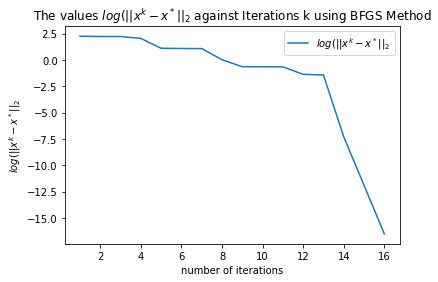

In [143]:
plt.plot([i+1 for i in np.arange(16)], x_BFGS,label=r'$ $')
plt.title('The values $log(||x^k - x^*||_2$ against Iterations k using BFGS Method')
plt.xlabel('number of iterations')
plt.ylabel('$log(||x^k - x^*||_2$')
plt.legend([r'$log(||x^k - x^*||_2$'])
plt.show()

#• Preparing a different plot for plotting log(|f(x^k)−f(x∗)|)$ obtained from BFGS method against the iterations

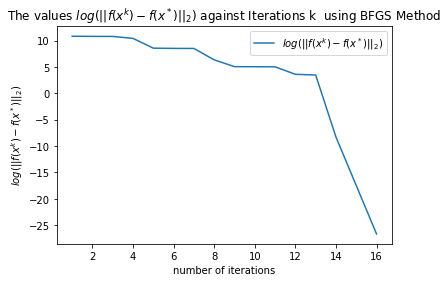

In [144]:
plt.plot([i+1 for i in np.arange(16)], f_BFGS,label=r'$ $')
plt.title(r'The values $log(||f(x^k) - f(x^*)||_2)$ against Iterations k  using BFGS Method')
plt.xlabel(r'number of iterations')
plt.ylabel(r'$log(||f(x^k) - f(x^*)||_2)$')
plt.legend([r'$log(||f(x^k) - f(x^*)||_2)$'])
plt.show()

In the above  graph,

when  number of iterations are incresesing  the value of  $log(||x^k+1−x∗||2)−log(||x^k−x∗||2)$  is negative,
 hence the convergence of function is Q-Linear.

#4. [R] Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the time taken by both the methods.

#Solution:

Time taken by Newton's method:  $0.007738190000054601$

Time taken by BFGS:  $0.02298356800019974$

time taken by Newton method is less than BFGS mwthod

#BFGS Method optimizers: 
********************************************************************************

x_str: [[-1.68672761]

 [ 2.16855328]

 [-3.39032522]

 [ 4.7181836 ]

 [-5.46236925]

 [ 6.22803418]

 [-7.61166054]

 [ 8.65518106]

 [-9.80627458]

 [10.04154365]]

x_bar: 
[[-1.72037624]

 [ 2.13967749]

 [-3.35576417]

 [ 4.75320386]

 [-5.4616303 ]

 [ 6.23896224]

 [-7.60715999]

 [ 8.62793845]

 [-9.8523289 ]

 [10.07633614]]

#For Newton's Method Otimizer : 
_____________________________________________________________
x_str: [[-1.68672761]

 [ 2.16855328]

 [-3.39032522]

 [ 4.7181836 ]

 [-5.46236925]

 [ 6.22803418]

 [-7.61166053]

 [ 8.65518106]

 [-9.80627458]

 [10.04154365]]

x_bar:

 [[-1.72037624]

 [ 2.13967749]

 [-3.35576417]

 [ 4.75320386]

 [-5.4616303 ]

 [ 6.23896224]

 [-7.60715999]

 [ 8.62793845]

 [-9.8523289 ]

 [10.07633614]]

In both method the values of the optimizer are equal

The number  of iterations in newton method < the number of iteration in BFGS